In [1]:
import sys
sys.path.append('../../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

2024-03-18 10:41:13.268448: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 10:41:13.268489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 10:41:13.268498: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_'
L = 'all'
window_size=3

In [3]:
ML_data = datasets.MOM6_all_transformer('-', 'all', 
                                       input_channels = ['U_x', 'U_y', 
                                                         'V_x', 'V_y', 
                                                         'Sx', 'Sy'])

In [4]:
ML_data.read_datatree(MOM6_bucket, 
                      file_names='', # need this for file names in DG sim
                      keep_filt_scale=True, 
                      para_perp_out = True, 
                      eta_bottom=True,
                      large_filt=4,
                      H_mask=150,
                      sub_sample=True, 
                      window_size=window_size)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_50km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_100km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_200km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_400km.zarr
Out para perp
Subsampling


In [5]:
ML_data.generate_test_train_batches(normalize=False, input_dims = {'Xn':window_size,'Yn':window_size})

Test and train batches split. Number of batches: 37-5


In [6]:
ANN_model = ML_classes.ANN(num_in =  len(ML_data.input_channels)* ML_data.window_size**2)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [7]:
ML_data.input_channels

['U_x', 'U_y', 'V_x', 'V_y', 'Sx', 'Sy']

In [8]:
regress_sys = ML_classes.RegressionSystem(ANN_model, local_norm=True)

In [9]:
%%time
regress_sys.train_system_windowed(ML_data, 31, 1)

Train loss step 0:  0.23865148062641556 test loss: 0.119411800801754
Train loss step 1:  0.10560706157136608 test loss: 0.09001637548208237
Train loss step 2:  0.0846489611509684 test loss: 0.07671845555305482
Train loss step 3:  0.07443725478810233 test loss: 0.06869364380836487
Train loss step 4:  0.06712681860537142 test loss: 0.06329630762338638
Train loss step 5:  0.06228490546345711 test loss: 0.05988592654466629
Train loss step 6:  0.059460309308928413 test loss: 0.05760418027639389
Train loss step 7:  0.05720999424119253 test loss: 0.05594073161482811
Train loss step 8:  0.05573313109375335 test loss: 0.054534824937582015
Train loss step 9:  0.05476256067285667 test loss: 0.053648791462183
Train loss step 10:  0.05378985032439232 test loss: 0.05246838703751564
Train loss step 11:  0.05292821897042764 test loss: 0.051717837899923326
Train loss step 12:  0.05208333883736584 test loss: 0.05090517103672028
Train loss step 13:  0.05129974979806591 test loss: 0.05033661648631096
Trai

In [12]:
%%time
regress_sys.train_system_windowed(ML_data, 11, 1)

Train loss step 0:  0.04282816388719791 test loss: 0.04272151216864586
Train loss step 1:  0.04259287435058001 test loss: 0.04243889376521111
Train loss step 2:  0.04232145382745846 test loss: 0.04226691424846649
Train loss step 3:  0.042054159717785346 test loss: 0.04213850498199463
Train loss step 4:  0.04180027826412304 test loss: 0.04227820411324501
Train loss step 5:  0.04159488730333947 test loss: 0.04239012449979782
Train loss step 6:  0.041270962035333786 test loss: 0.04140003323554993
Train loss step 7:  0.04133529789947175 test loss: 0.041830948740243915
Train loss step 8:  0.040944675537380015 test loss: 0.04133727177977562
Train loss step 9:  0.040909400662860355 test loss: 0.04143090695142746
Train loss step 10:  0.04068087353496938 test loss: 0.04118908643722534
CPU times: user 11min 4s, sys: 1.25 s, total: 11min 6s
Wall time: 10min 42s


In [16]:
%%time
regress_sys.train_system_windowed(ML_data, 31, 1)

Train loss step 0:  0.04060065877195951 test loss: 0.04123738780617714
Train loss step 1:  0.040408688018450864 test loss: 0.04088456854224205
Train loss step 2:  0.040391990260497945 test loss: 0.04117301926016807
Train loss step 3:  0.040113392915274645 test loss: 0.04031195715069771
Train loss step 4:  0.040289713824922975 test loss: 0.04053284227848053
Train loss step 5:  0.03977746848721762 test loss: 0.040415655076503756
Train loss step 6:  0.04011705437222043 test loss: 0.04060028046369553
Train loss step 7:  0.03958824609179754 test loss: 0.040160907059907915
Train loss step 8:  0.03987684382780178 test loss: 0.040165428817272184
Train loss step 9:  0.03941599058138358 test loss: 0.03978482484817505
Train loss step 10:  0.03963138354388443 test loss: 0.039860958606004714
Train loss step 11:  0.03919696093008325 test loss: 0.039756964147090915
Train loss step 12:  0.03942802125537718 test loss: 0.039606187492609024
Train loss step 13:  0.03895214995419657 test loss: 0.0396586380

(0.03, 0.3)

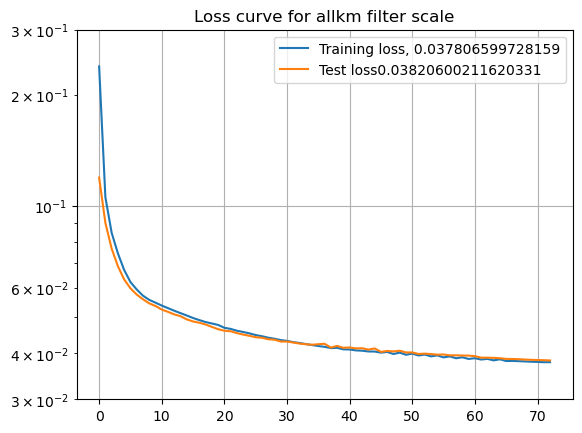

In [17]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()
plt.ylim([0.03, .3])

#plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [20]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_DG_window_3_local_norm_true_out_para_perp'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_DG_all_window_3_local_norm_true_out_para_perp'+'.nc'
regress_sys.save_weights_nc(model_nc)

In [14]:
ANN_model_large = ML_classes.ANN(shape=[36,36,2], num_in = len(ML_data.input_channels))

In [18]:
regress_sys_large = ML_classes.RegressionSystem(ANN_model_large, local_norm=True)

In [18]:
%%time
regress_sys_large.train_system(ML_data, 31, 1)

NameError: name 'regress_sys_large' is not defined

In [20]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp_size_36_36'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp_size_36_36'+'.nc'
regress_sys.save_weights_nc(model_nc)